In [ ]:
import nltk
nltk.download('stopwords')
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install gensim==3.8.3

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/root/venv/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/root/venv/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/root/venv/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/root/venv/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/root/venv/lib/python3.7/site-packages/pip/_internal/commands/install

In [ ]:
!pip install np_utils==0.5.12.1

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
pip install scikit-plot

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Fake news detection
The Keras version of neural network
"""

from  getEmbeddings import getEmbeddings
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras 
from tensorflow.keras import backend as K
import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import os




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


# Read the data
if not os.path.isfile('./xtr.npy') or \
    not os.path.isfile('./xte.npy') or \
    not os.path.isfile('./ytr.npy') or \
    not os.path.isfile('./yte.npy'):
    xtr,xte,ytr,yte = getEmbeddings("datasets/train.csv")
    np.save('./xtr', xtr)
    np.save('./xte', xte)
    np.save('./ytr', ytr)
    np.save('./yte', yte)

xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')
ytr = np.where(ytr<1, 1, 0)
yte  = np.where(yte <1, 1, 0)




In [ ]:
def baseline_model():
    '''Neural network with 3 hidden layers'''
    model = Sequential()
    model.add(Dense(256, input_dim=300, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(80, activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, activation="sigmoid", kernel_initializer='normal'))

    # gradient descent
    sgd = SGD(lr=0.04, decay=1e-6, momentum=0.9, nesterov=True)
    
    # configure the learning process of the model
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model



In [ ]:
model = baseline_model()
model.summary()
x_train, x_test, y_train, y_test = train_test_split(xtr, ytr, test_size=0.2, random_state=42)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               77056     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               6

In [ ]:
print(y_train)
#print(encoded_y)

[1 1 1 ... 1 0 0]


In [ ]:
print(x_train.shape)
print(x_train)

(6396, 300)
[[-5.03919959e-01  1.08449662e+00 -4.89026368e-01 ... -2.45303378e-01
   1.12291324e+00  7.47111142e-02]
 [-4.80423391e-01 -2.19838470e-02  6.18526697e-01 ... -4.21398729e-02
  -1.61386162e-01  1.80588558e-01]
 [ 4.48938251e-01  2.33382747e-01  3.65224361e-01 ... -2.81943798e-01
   1.60297647e-01 -4.97941732e-01]
 ...
 [ 6.69540644e-01  1.26391605e-01  7.31868371e-02 ... -1.72152132e-01
   2.38453820e-01 -5.46325743e-01]
 [ 3.46862048e-01  1.73843265e-01  4.67469729e-02 ... -3.78008634e-01
   7.87545800e-01  4.19207573e-01]
 [-1.03207669e-04 -3.29028029e-04 -2.33980216e-04 ...  9.15699813e-04
  -1.17929478e-03 -4.37680574e-04]]


In [ ]:
# Train the model
from tensorflow.keras.utils import to_categorical

model = baseline_model()
model.summary()
x_train, x_test, y_train, y_test = train_test_split(xtr, ytr, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y = to_categorical((label_encoder.transform(y_train)))

label_encoder.fit(y_test)
encoded_y_test = to_categorical((label_encoder.transform(y_test)))
estimator = model.fit(x_train, y_train, epochs=8, batch_size=128)
print("Model Trained!")
score = model.evaluate(x_test, y_test)
print("")
print("Accuracy = " + format(score[1]*100, '.2f') + "%")   



 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               77056     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)              

In [ ]:
y_pred=model.predict(x_test)
# y_pred=np.argmax(predict_prob,axis=1)

In [ ]:
y_pred = np.where(y_pred>0.5, 1, 0)
print(y_pred)

[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]


In [ ]:
with open('keras.sav', 'wb') as files:
    pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://32a840ca-6625-4c29-9863-7f75d1c387ad/assets


In [ ]:
m = y_test.shape[0]
tp=0
tn=0
fp=0
fn=0
for i in range(m):
    if (y_pred[i]==0 and (y_test[i]!=y_pred[i])):
        fn+=1
    elif (y_pred[i]==1 and (y_test[i]!=y_pred[i])):
        fp+=1
    elif (y_pred[i]==0 and (y_test[i]==y_pred[i])):
        tn+=1
    elif (y_pred[i]==1 and (y_test[i]==y_pred[i])):
        tp+=1

precision=(tp)/(tp+fp)*100
recall=(tp)/(tp+fn)*100
print("Accuracy = " + format((tp+tn)/(tp+tn+fp+fn)*100, '.2f') + "%")   
print("F1-Score = " + format(((2*precision*recall)/(precision+recall)), '.2f') + "%")   
print("Recall = " + format((tp)/(tp+fn)*100, '.2f') + "%")   
print("Precision = " + format((tp)/(tp+fp)*100, '.2f') + "%")   
print("Specificity = " + format((tn)/(tn+fp)*100, '.2f') + "%")  

Accuracy = 86.74%
F1-Score = 85.79%
Recall = 85.22%
Precision = 86.37%
Specificity = 88.09%


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


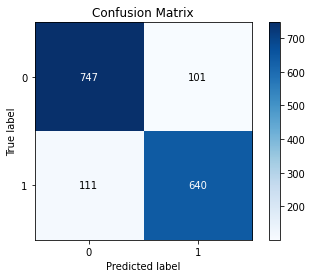

In [ ]:
# Draw the confusion matrix
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte, ypred)
    plt.grid(False)
    plt.show()
    
plot_cmat(y_test, y_pred)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a2c2a1b-c190-4238-a7b0-93cabb99b4e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>